# MATH10098: Numerical Linear Algebra - Workshop week 5

# Pair-programming

In the computer labs in this course, you will work on a programming task together with a partner, using a method called **pair programming**. 

## What is pair programming?

Pair programming is a method where two people (usually) sit in front of the same computer. Each person has a specific role:
- The **driver** writes and runs the code, and is the only person allowed to do it. They explain what they do to the navigator.
- The **navigator** observes and helps the driver, spots errors in the code, gives suggestions and ideas... They are not allowed to write code.

The two programmers decide who should "drive" first, and that person takes the keyboard to start working. The other person, the navigator, watches the screen and helps the driver with the task -- without touching the mouse or keyboard.

Then, after a while, the driver passes the keyboard and mouse to the navigator, and they switch roles.

## How does it work online?

This year, unfortunately, you won't be able to sit next to your partner and to share a computer. Instead, you will use Teams to communicate, share your screens, and "pass the keyboard" when you switch roles. During computer labs, we will typically ask you to switch roles every 15 minutes or so.

A typical workflow in an online computer lab:

1. Go the channel in Teams based on your surname, where your tutor will start a meeting.
2. Your tutor breaks the group into pairs, and each pair starts their own meeting.
3. Decide which one of you starts as the driver. The driver downloads the Jupyter notebook from Learn, and starts screen sharing.
4. Work through the exercises, switching roles every 10-15 minutes.
5. At the end, make sure both of you have a copy of all the code that you wrote!

## How do we switch roles?

When you switch roles, you need to pass on the code that the driver has written so far to the new driver. This can be done in the following ways:

Option 1: Using Teams
1. The old driver goes to the meeting chat, clicks on Format -> Code snippet and posts the code there. 

Option 2: Using pastebin
1. The old driver goes to to https://pastebin.com/.
2. The old driver copies the code they want to share, and pastes it into the pastebin website.
3. The old driver clicks on "Create paste", and shares the new URL with the new driver.
4. The new driver copies the code from the URL, and pastes it into their Jupyter notebook.

# Computer lab exercises
Work on these exercises with your partner during the live computer lab.

### Exercise 1 

Write a function that uses the LU factorisation of $\mathbf A$ to compute $det(\mathbf A)$. You may use any properties of determinants without proof, but you should state which properties you are using in the comments.

Test your code on the example at the bottom of the code cell (the correct answer is -8).

*Python's built in determinant function np.linalg.det is in fact based on an LU factorisation with partial pivoting.*

In [20]:
import numpy as np
import scipy.linalg as la

def LU(A):
    
    n = A.shape[0]
    L = np.eye(n)
    U = A
    
    for k in range(0,n):
        for j in range(k+1,n):
            
            L[j,k] = U[j,k]/U[k,k]
            U[j,k:n-1] = U[j,k:n-1] - L[j,k]*U[k,k:n-1]
            
            
    return L, U

def det(A):
    
    # det(A) = det(LU) = det(L)*det(U) = (product of diagonals of L)*(product of diagonals of U)
    
    n = A.shape[0]
    P, L, U = la.lu(A)
    print(L,U)
    L_m = L[0,0]
    U_m = U[0,0]
    
    for i in range(1,n):
        for j in range(1,n):
            if(i == j):
                L_m = L_m * L[i,j]
                U_m = U_m * U[i,j]
    
    d = L_m*U_m
    
    return d

# Testing the function on the given example
A = np.array([[2, 1, 0], [4, 3, 3], [6, 7, 8]], dtype=float)
d = det(A)
print(d)

[[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.8        1.        ]] [[ 6.          7.          8.        ]
 [ 0.         -1.66666667 -2.33333333]
 [ 0.          0.         -0.8       ]]
7.999999999999997


### Exercise 2

Consider the system of linear equations
$$
\mathbf A \mathbf x = \mathbf b,
$$
where $\mathbf A \in \mathbb R^{n \times n}$ is invertible and $\mathbf b \in \mathbb R^n$.

Cramer's rule states that the solution is given by
$$
x_i = \frac{det (\mathbf {A_i})}{det(\mathbf A)}, \qquad i=1, \dots, n, 
$$
where $\mathbf {A_i} \in \mathbb R^{n \times n}$ is the matrix $\mathbf A$ with the $i$th column replaced by $\mathbf b$ and $det$ denotes the determinant.

Write a function *solve_Cramer* that computes the solution $\bf x$ using Cramer's rule. You can use your function *det* from Exercise 1, or the built-in Python routine np.linalg.det.

In [103]:
import numpy as np

def solve_Cramer(A,b):
    
    n = len(b)
    det_A = np.linalg.det(A)
    b_column = b
    x = []
    
    for i in range(n):
        if i == 0:
            A_i = np.append(b_column, A[:,1:], axis=1)
            x_i = np.linalg.det(A_i)/det_A
            x.append(x_i)
            
        elif i == n-1:
            A_i = np.append(A[:,:i], b_column, axis=1)
            x_i = np.linalg.det(A_i)/det_A
            x.append(x_i)
            
        else:
            A_left = np.append(A[:,:i], b_column, axis=1)
            A_i = np.append(A_left, A[:,i+1:], axis=1) 
            x_i = np.linalg.det(A_i)/det_A
            x.append(x_i)
    
    return x

# Testing the function on the given example
A = np.array([[2, 1, 0], [4, 3, 3], [6,7,8]], dtype=float)
b = np.array([[4],[10],[24]], dtype=float) 
x = solve_Cramer(A,b)

A@x, b

(array([ 4., 10., 24.]),
 array([[ 4.],
        [10.],
        [24.]]))

In [104]:
A = np.array([[2, 1, 0], [4, 3, 3], [6,7,8]], dtype=float)
b = np.array([4,10,24], dtype=float) 
b = np.array([[4],[10],[24]], dtype=float) 
A_i = np.append(A[:,:2], b, axis=1)
print(A[:,1+1:])

[[0.]
 [3.]
 [8.]]


### Exercise 3

How does Cramer's rule from Exercise 2 compare to the built-in Python solver np.linalg.solve in terms of computational time and accuracy of the computed solution? Test the two methods on matrices of varying size $n$ between 10 and 150.

In [106]:
import numpy as np
import time

ns = [n for n in range(10,150,10)]
crammer_times = []
inbuilt_times = []

for n in ns:
    
    A = np.random.random((n,n))
    b = np.random.random((n,1))
    time_0 = time.time()
    solve_Cramer(A,b)
    time_end = time.time() - time_0
    
    crammer_times.append(time_end)
    
    time_0 = time.time()
    np.linalg.solve(A,b)
    time_end = time.time() - time_0
    
    inbuilt_times.append(time_end)

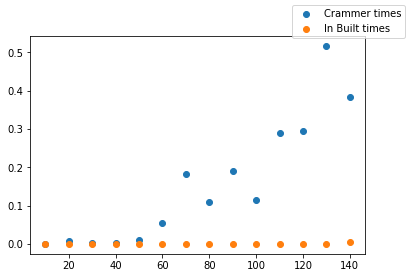

In [113]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(ns,crammer_times,label = 'Crammer times')
ax.scatter(ns,inbuilt_times, label = 'In Built times')
fig.legend()

### Exercise 4

In the code cell below, code an *efficient* algorithm to solve the system of equations $\mathbf{A}^m \mathbf{x} = \mathbf{b},$ for some $m \in \mathbb N$. 

The computational cost of your algorithm should *not* contain a term involving $m n^3$, which is prohibitively large for large m!

*Hint: rewrite $\mathbf{A}^m \mathbf{x} = \mathbf{b}$ as a sequence of $m$ systems of linear equations*.

In [ ]:
import numpy as np

# add code here

---

# Individual exercises
Work on these exercises in your own time.

### Exercise 5

For $n=50 \times 2^k$ with $k=1, 2, \dots, 5$:

(i) Set up a random matrix `A` of dimension $n$.

(ii) Create a vector `xsol` to represent a vector $x^{\ast} \in \mathbb{R}^n$, all of whose entries are $1$.

(iii) Compute the vector `b` such that $b = Ax^\ast$.

(iv) Use Algorithm GE to solve $Ax=b$, and store the solution in the variable `x1`. Take note of the elapsed time, as well as the $\infty-$norm of the residual `A @ x1 - b` and the error `xsol - x1`. You may wish to use functions you have written in previous workshops.

(v) Use Algorithm GEPP to solve $Ax=b$, and store the solution in the variable `x2`. Take note of the elapsed time, as well as the $\infty-$norm of the residual `A @ x2 - b` and the error `xsol - x2`.

How do the elapsed times of the two algorithms compare? Is this what you expected?

How do the norms of the residual and the error compare? Is this what you expected?

In [ ]:
import numpy as np
import time

# add code here

---

### Exercise 6 (Difficult, Algorithm SQR with Householder)

Write an *efficient* implementation of Algorithm SQR, with the QR factorisation computed by the Householder method (Algorithm QR).

In [ ]:
import numpy as np

# add code here
